In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.constants as sc
import pandas as pd

In [2]:
import sys
sys.path.append('/home/ramsus/Programming/NicolasPersonal/University/Herramientas')

import MinimosCuadradosOrdinarios as mc
import MetodosBasicos as mb
import Datos as dt

In [3]:
def filtro(lis,lim):
    l = []
    for var in lis:
        if var > lim:
            l.append(var)
    return l

def conversion(px):
    return (0.3515*px)/1030

In [4]:
deu, h, ne, na, hg= dt.deu, dt.h, dt.ne, dt.na, dt.hg
cd, ch = conversion(dt.cd), conversion(dt.ch)
cne = conversion(ne['in'].idxmax() )

ide = mb.puntosCriticos(0, max(deu.index), deu) 
d = [conversion(var) for var in ide if int(deu.iloc[var]) > 10000]

ih = mb.puntosCriticos(0, max(h.index), h)
hh = [conversion(var) for var in ih if int(h.iloc[var]) > 10000]
hh.append(conversion(1224))

delta = np.abs(cd-ch)
deltane = np.abs(cne-ch)

lambdaNe = 655.9285
lambdaH = deltane + lambdaNe
lambdaDe = lambdaH - delta

print(lambdaNe, lambdaH, lambdaDe)

655.9285 656.323681553398 656.3032058252427


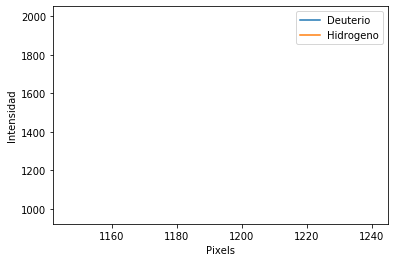

0.020475728155339767


In [5]:
plt.plot(deu.index, deu['in'], label='Deuterio')
plt.plot(h.index, h['in'], label='Hidrogeno')
plt.xlim(1142,1245)
plt.legend()
plt.xlabel('Pixels')
plt.ylabel('Intensidad')
plt.savefig('deuhi.png')
plt.show()

print(delta)

In [6]:
R = 10973731.568
a = ( ( delta*(10**(9)) )/(( R*0.139 ) ) + sc.m_p/(sc.m_p+sc.m_e))
Mn = ( a*sc.m_p+ a*sc.m_e- sc.m_p )/(1+a)

def lambdadeu (M):
    mr = (sc.m_e*M)/(M+sc.m_e)
    return 1/(mr*R*(0.139))
def lambdah (M2):
    return  1/(R*(0.139))
print('Masa Experimental 1 electron = '+str(Mn))

Masa Experimental 1 electron = 1.4565754042937015e-27


0.0047776699029126206


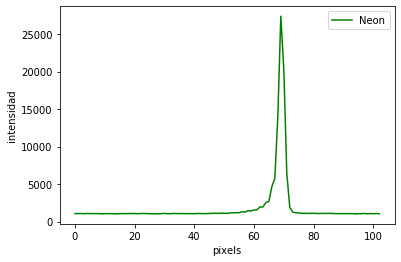

In [7]:
print(conversion(14) )
plt.plot(ne.index, ne['in'], c ='g', label = 'Neon')
plt.xlabel('pixels')
plt.ylabel('intensidad')
plt.legend()
plt.savefig('neon.png')
plt.show()


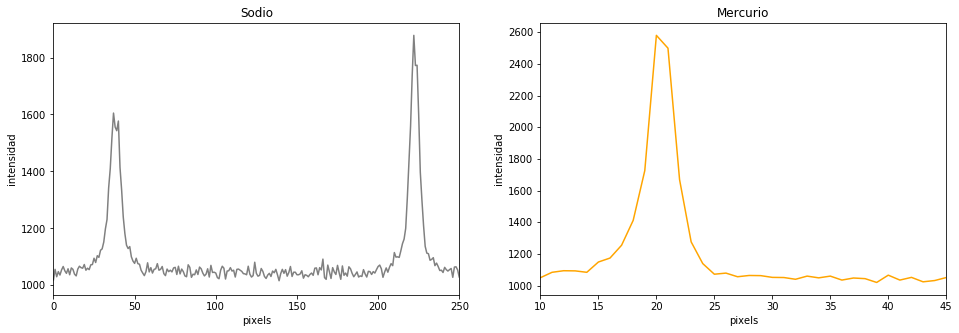

In [25]:
fig, axs = plt.subplots(1,2, figsize =  (16,5))
axs[0].plot(na.index, na['in'], c ='gray')
axs[0].set_xlabel('pixels')
axs[0].set_xlim(0,250)
axs[0].set_ylabel('intensidad')
axs[0].set_title('Sodio')

axs[1].plot(hg.index, hg['in'], c ='orange')
axs[1].set_xlabel('pixels')
axs[1].set_xlim(10,45)
axs[1].set_ylabel('intensidad')
axs[1].set_title('Mercurio')

plt.savefig('todos.png')
plt.show()

In [9]:
ine = mb.puntosCriticos(0, max(ne.index), ne)
lne = [conversion(var) for var in ine if int(ne.iloc[var]) > 9000]

In [10]:
ala=1.0970742659e7*(0.25-(1/9))
bla = 1.09678e7*(0.25-(1/9))
print(1/ala, 1/bla)

6.562910300419252e-07 6.564671128211673e-07
